In [1]:

import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
df = pd.read_csv("C://Users//ABDUL SAMAD//Downloads//archive (6)//spam.csv", encoding="ISO-8859-1")


In [4]:
# Basic tokenization function
def basic_tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# Predefined list of common stopwords
common_stopwords = {
    'ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once',
    'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for',
    'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's',
    'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below',
    'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more',
    'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to',
    'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and',
    'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because',
    'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself',
    'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few',
    'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how',
    'further', 'was', 'here', 'than'
}

# Preprocessing the messages
msg = df['v2']
msg = msg.apply(lambda x: ' '.join(basic_tokenize(x)))  # Basic tokenization
msg = msg.apply(lambda x: ' '.join(word for word in x.split() if word not in common_stopwords))  # Removing stopwords


In [5]:
# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000)
x = vectorizer.fit_transform(msg)
y = df['v1'].map({'spam': 1, 'ham': 0})  # Mapping 'spam' to 1 and 'ham' to 0
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [6]:
# Train the SVM model
SVM_model = SVC()
SVM_model.fit(x_train, y_train)
y_pred_SVM = SVM_model.predict(x_test)


In [7]:
# Evaluate the SVM model
classification_report_SVM = classification_report(y_test, y_pred_SVM)
confusion_matrix_SVM = confusion_matrix(y_test, y_pred_SVM)


In [7]:
# Train the Multinomial Naive Bayes model
NB_model = MultinomialNB()
NB_model.fit(x_train, y_train)
y_pred_NB = NB_model.predict(x_test)


In [8]:
# Evaluate the Multinomial Naive Bayes model
classification_report_NB = classification_report(y_test, y_pred_NB)
confusion_matrix_NB = confusion_matrix(y_test, y_pred_NB)


In [9]:
# Train the Random Forest model
RF_model = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1)
RF_model.fit(x_train, y_train)
y_pred_RF = RF_model.predict(x_test)


In [10]:
# Evaluate the Random Forest model
classification_report_RF = classification_report(y_test, y_pred_RF)
confusion_matrix_RF = confusion_matrix(y_test, y_pred_RF)


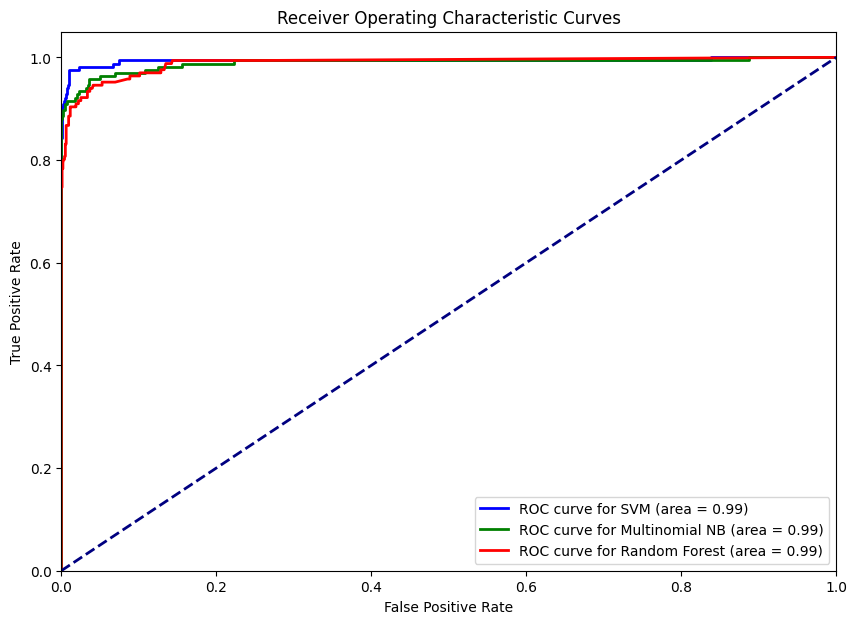

In [11]:
# Plot the ROC curves for each model
y_score_SVM = SVM_model.decision_function(x_test)
y_score_NB = NB_model.predict_proba(x_test)[:, 1]
y_score_RF = RF_model.predict_proba(x_test)[:, 1]
fpr_SVM, tpr_SVM, _ = roc_curve(y_test, y_score_SVM, pos_label=1)
fpr_NB, tpr_NB, _ = roc_curve(y_test, y_score_NB, pos_label=1)
fpr_RF, tpr_RF, _ = roc_curve(y_test, y_score_RF, pos_label=1)
plt.figure(figsize=(10, 7))
plt.plot(fpr_SVM, tpr_SVM, color='blue', lw=2, label=f'ROC curve for SVM (area = {auc(fpr_SVM, tpr_SVM):.2f})')
plt.plot(fpr_NB, tpr_NB, color='green', lw=2, label=f'ROC curve for Multinomial NB (area = {auc(fpr_NB, tpr_NB):.2f})')
plt.plot(fpr_RF, tpr_RF, color='red', lw=2, label=f'ROC curve for Random Forest (area = {auc(fpr_RF, tpr_RF):.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.legend(loc="lower right")
plt.show()


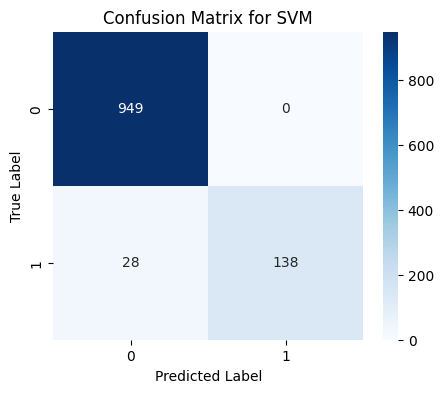

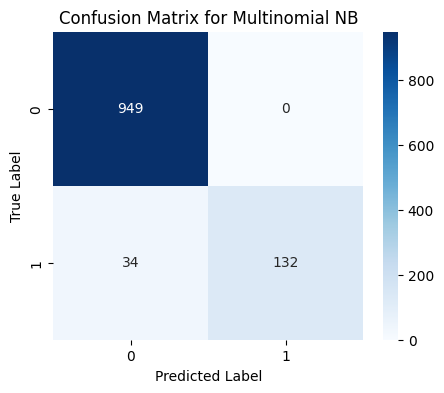

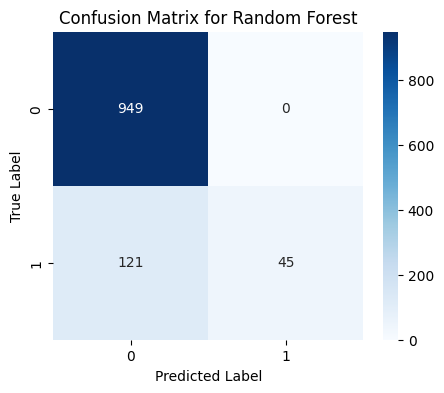

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the function to plot confusion matrix
def plot_confusion_matrix(confusion_mat, model_name):
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Assuming confusion_matrix_SVM, confusion_matrix_NB, and confusion_matrix_RF are already defined
# Now call the function to plot the confusion matrices
plot_confusion_matrix(confusion_matrix_SVM, 'SVM')
plot_confusion_matrix(confusion_matrix_NB, 'Multinomial NB')
plot_confusion_matrix(confusion_matrix_RF, 'Random Forest')